In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [30]:
import os
all_dfs = []
directory = os.fsencode("feature data/")
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith("0.csv"): 
         all_dfs.append(pd.read_csv("feature data/" + filename, header=None))
len(all_dfs)

24

In [31]:
data = pd.concat(all_dfs)
pd.set_option('display.max_rows', 10)
data

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,0.0,0.0,0.229167,0.002551,0.365741,0.015306,0.502315,0.048469,0.634259,0.109694,...,0.642857,0.645833,0.706633,0.675926,0.640306,0.659722,0.591837,0.664352,0.540816,0.662037
1,0.0,0.0,0.185682,0.002475,0.331096,0.014851,0.478747,0.049505,0.621924,0.118812,...,0.740099,0.642058,0.779703,0.668904,0.735149,0.648770,0.693069,0.651007,0.643564,0.646532
2,0.0,0.0,0.225653,0.007634,0.372922,0.020356,0.520190,0.061069,0.662708,0.134860,...,0.745547,0.646081,0.788804,0.674584,0.745547,0.655582,0.702290,0.657957,0.651399,0.655582
3,0.0,0.0,0.221258,0.012195,0.355748,0.021951,0.494577,0.046341,0.629067,0.102439,...,0.717073,0.577007,0.760976,0.618221,0.714634,0.587852,0.665854,0.590022,0.612195,0.587852
4,0.0,0.0,0.309693,0.007812,0.442080,0.023438,0.574468,0.054688,0.706856,0.119792,...,0.716146,0.612293,0.770833,0.659574,0.716146,0.621749,0.666667,0.619385,0.617188,0.619385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,10.0,0.0,0.232416,0.008982,0.360856,0.026946,0.486239,0.053892,0.611621,0.098802,...,0.514970,0.611621,0.616766,0.629969,0.514970,0.617737,0.464072,0.626911,0.416168,0.623853
7,10.0,0.0,0.187117,0.006006,0.322086,0.024024,0.450920,0.042042,0.579755,0.078078,...,0.519520,0.610429,0.612613,0.631902,0.519520,0.619632,0.465465,0.625767,0.417417,0.622699
8,10.0,0.0,0.254545,0.011662,0.384848,0.032070,0.512121,0.064140,0.636364,0.113703,...,0.516035,0.612121,0.618076,0.630303,0.513120,0.627273,0.463557,0.636364,0.416910,0.633333
9,10.0,0.0,0.199405,0.005780,0.330357,0.017341,0.458333,0.037572,0.583333,0.075145,...,0.497110,0.610119,0.606936,0.619048,0.494220,0.619048,0.439306,0.630952,0.390173,0.627976


In [33]:
X = data.iloc[:, [i for i in range(1, 137)]]
Y = data.iloc[:, 0]

In [56]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20, shuffle=False)

In [178]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', bootstrap=False)
classifier.fit(X_Train,Y_Train)

RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=15)

In [179]:
from sklearn.metrics import accuracy_score
Y_Pred = classifier.predict(X_Test)
accuracy = accuracy_score(Y_Test, Y_Pred)
accuracy

0.6730769230769231

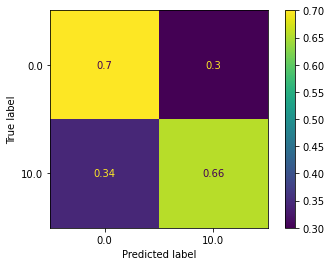

In [180]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_Test, Y_Test, normalize="true")

In [59]:
import joblib
joblib.dump(classifier, "rf_model.joblib")

['rf_model.joblib']